# レッスン の概要

このレッスンでは、ジオメトリデータや属性データを操作できるテーブル状のPython オブジェクト、Spatially Enabled DataFrame（SEDF）について学びます。SEDFにフィーチャ サービスとフィーチャクラスを読み込む方法、SEDFからフィーチャクラスへ書き込む方法、フィーチャ サービスを公開する方法、SEDFを使用してマップにフィーチャをプロットする方法について学習します。また、サードパーティ製の描画ライブラリである [Matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/), [Plotly](https://plotly.com/python/) を使って、フィーチャの属性を描画する方法についても学びます。このレッスンを修了すると、ワークフローの自動化、データのクエリ、空間データ サイエンスをより深く追求するのに、SEDFを使うことができるようになります。

このレッスンでは、**Standard** ランタイムを使用する新しい ArcGIS Notebook を作成することから始めます。ArcGIS Notebook を初めて使用する場合は、入門レッスン [Hello, Notebook!](https://learngis.maps.arcgis.com/home/item.html?id=badcc4eb14784fcb8388e69568d2edc6) ([初めてのノートブック](https://github.com/EsriJapan/learn-python-with-arcgis-notebooks/blob/main/HelloNotebook_ja.ipynb) )を参照し、ノートブックのランタイムについて学び、ArcGIS Notebook を作成する方法を習得してください。この新しいノートブックに *Data_Viz_with_the_SEDF_* と、自分のイニシャルを続けて命名します。ノートブックを作成する際には、タグとサマリーを付けることを忘れないでください。このレッスン ノートを開いたままにしておくと、指示に従って進めることが可能です。

このレッスンを通して、次のような方法を学びます。
* [Spatially Enabled DataFrame とは?](#what-is)
* [Spatially Enabled DataFrame へフィーチャ レイヤーを読み込む](#reading)
* [フィーチャ レイヤーの属性テーブルとしてのSEDF](#table)
* [クエリの結果を Spatially Enabled DataFrame に格納する](#query)
* [Spatially Enabled DataFrame を公開する](#publish)
* [フィーチャクラスやシェープファイルへ書き込む](#write-to-fc)
* [フィーチャクラスをSpatially Enabled DataFrame へ読み込む](#fc-to-SEDF)
* [データのプロット](#plotting)
    * [Matplotlib](#matplotlib)
    * [Pandas](#pandas)
    * [Seaborn](#pandas)
    * [Plotly](#plotly)
* [要約](#summary)
* [チャレンジ](#challenge)

# Spatially Enabled DataFrame とは？<a class="anchor" id="what-is"></a>

Spatially Enabled DataFrame は ```spatial``` という名前のカスタム名前空間で、人気のある [pandas](https://pandas.pydata.org/) [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) 構造を拡張して空間機能を持たせています。Pandas は強力なPython ライブラリで、データサイエンスのコミュニティではデータクリーニングや分析に広く利用されています。

SEDFを使用すると、pandas DataFrame 内のフィーチャクラスの属性と空間カラムを操作することができます。SEDF は、フィーチャ レイヤーおよびフィーチャクラスからの読み込みと、フィーチャ レイヤーおよびフィーチャクラスへの書き込みをサポートしています。ArcGIS Notebooks を ArcGIS Online と統合すると、ローカル コンピュータへのデータのコピーを気にすることなく、SEDF にフィーチャ レイヤーを読み込み、分析、レポートの作成、データの操作、またはフィーチャを別の形式に変換することができます。このレッスンでは、[Introduction to the Spatially Enabled DataFrame](https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/) のチュートリアルを拡張して、SEDF と ArcGIS Notebooks の統合、SEDF 操作と ArcGIS Online で実行する操作の比較、および SEDF で可能になるデータの可視化機能を説明します。

# Spatially Enabled DataFrame へフィーチャ レイヤーを読み込む<a class="anchor" id="reading"></a>

1. ArcGIS Notebooks で SEDF としてフィーチャ レイヤーを扱うための最初のステップは、ArcGIS Online アカウントに接続する ```GIS``` オブジェクトを作成することです。まず、その作業から始めましょう。新しいノートブックで作業している場合は、以下のコードを実行します。

In [ ]:
from arcgis.gis import GIS
gis = GIS("home")

2. ArcGIS Online に接続したので、esri_demographics が所有している [**Popular Demographics in the United States**](https://www.arcgis.com/home/item.html?id=2718975e52e24286acf8c3882b7ceb18) レイヤーを検索し、ノートブックに追加します。この方法がよくわからない場合は、[Hello, Notebook!](https://learngis.maps.arcgis.com/home/item.html?id=badcc4eb14784fcb8388e69568d2edc6) のレッスンを参照してください。

In [ ]:
# Item Added From Toolbar
# Title: Popular Demographics in the United States | Type: Feature Service | Owner: esri_demographics
item = gis.content.get("2718975e52e24286acf8c3882b7ceb18")
item

3. ノートブックにアイテムを追加したら、セルを実行します。

4. このレイヤーは、2018 年の米国の人口統計推計を含んでいます。このアイテムは [feature layer collection](https://developers.arcgis.com/python/guide/working-with-feature-layers-and-features/#:~:text=A%20feature%20layer%20collection%20is,service%20in%20a%20web%20GIS.) であり、フィーチャ レイヤー(feature layer)とテーブル(table)のコレクションであり、エンティティ間の関連付けがなされていることを意味します。 ```item.layers``` を呼び出して、feature layer collection のレイヤーをPrint 出力します。

In [ ]:
item.layers

5. リスト要素 **'/2'** は、郡別の人口統計です。これがあなたが扱うフィーチャ レイヤーです。これをSpatially Enabled DataFrame に読み込むには、 ```pandas``` パッケージを ```import``` し、さらに ```arcgis``` パッケージから [```GeoSeriesAccessor```](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=geoseriesaccessor#arcgis.features.GeoSeriesAccessor) を ```import``` する必要があります。これらのモジュールは ```pandas``` DataFrame を拡張し、空間演算をサポートする空間コンポーネントを含んでいます。これらのパッケージとモジュールをインポートします。

In [ ]:
import pandas as pd
from arcgis.features import GeoSeriesAccessor

6. [from_layer](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=from_layer#arcgis.features.GeoAccessor.from_layer) メソッドを使用して、人口統計の郡別レイヤーを```SEDF``` という名前のSEDF オブジェクト に読み込みます。人口統計の郡別レイヤーは ```items.layers``` の 3 番目のレイヤーで、インデックス番号 2 の ```items.layers[2]``` でアクセスします。

```from_layer``` を使用する場合、```arcgis``` がpandasに追加した ```spatial``` の名前空間を介して ```pd.DataFrame.spatial.from_layer()``` でアクセスします。

In [ ]:
sedf = pd.DataFrame.spatial.from_layer(item.layers[2])

7. ```pandas``` の[```head```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) 関数を使用すると、SEDFの最初の5行とカラム名を表示することができます。デフォルトでは、```head``` はデータフレームの最初の5行を表示します。```sedf.head()``` を呼び出します。

In [ ]:
sedf.head()

8. ```pandas``` の[```tail```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) 関数を使用すると、SEDFの最後の5行とカラム名を表示することができます。 デフォルトでは、```tail``` はデータフレームの最後の5行を表示します。```sedf.tail()``` を呼び出します。

In [ ]:
sedf.tail()

9. ```sedf.shape``` を使用すると、データフレームの行と列の数を取得できます。行の数は郡の数に対応します。アメリカにはいくつの郡があるのでしょうか？

In [ ]:
sedf.shape

10. また、```sedf.columns``` を呼び出すことで、データフレームのカラム一覧を表示することができます。試してみてください。

In [ ]:
sedf.columns

# フィーチャ レイヤーの属性テーブルとしてのSEDF <a class="anchor" id="table"></a>

データフレームはフィーチャの属性テーブルと考えることができます。これを確認するために、ArcGIS Online の Web マップで同じフィーチャ レイヤーを見てみます。

1. 現在作業中のノートブックを保存します。

2. ノートブックから新しいweb マップを起動するには、ノートブックの左上にある三本線の箇所をクリックします。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/2807929fabc144c7afce3992450ac5f7/data" width="140px" />

3. **Map (マップ)** で右クリックし、**Open link in new window (リンクを新しいウィンドウで開く)** または **Open link in new tab (リンクを新しいタブで開く)** をクリックします（翻訳者注釈：ご利用のブラウザにより、表示されるコンテキストメニューは異なります）。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/12e6582927ea464fb43db4266fb53d67/data" width="360px" />  

組織およびユーザーの設定によっては、Map Viewer Classic で開いている場合があるかと思います。ArcGIS Online では、マップの表示、利用、および作成用に 2 つのマップ ビューアーが用意されています。利用可能なマップ ビューアーと使用するマップ ビューアーの詳細については、こちらの [FAQ](https://doc.arcgis.com/ja/arcgis-online/reference/faq.htm#anchor36) をご参照ください。
このレッスンでは、Map Viewer Classic を使用します。


4. Web マップで、**Popular Demographics in the United States** のフィーチャをマップに追加してください。まず、**Add (追加)** をクリックします。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/0e29aaf58dc44f728c9540314baa0b13/data" width="300px" />

5. **Search for Layers (レイヤーの検索)** をクリックします。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/549be86e59934f0089e476751dc5c7b1/data" width="200px" />

6. **Living Atlas** のコンテンツから **Popular Demographics in the United States** を検索します。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/1a2567bdbbd04f468d610f6cd6e66ac7/data" width="300px" />

7. **＋ add (追加)** ボタンをクリックして、**Popular Demographics in the United States** をマップに追加します。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/ee85178122ed4795adf87a3f376fb423/data" width="300px" />  

8. ← back (戻る) ボタンで **add (追加)** ペインを閉じ、**Content (コンテンツ)** をクリックします。

9. 郡の境界が見えるまでマップを拡大します。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/08cc28e55d244abeacbf2244da621350/data" width="600px" />

10. アクティブ レイヤーである **Popular Demographics in the United States - County** で、**Show Table (テーブルの表示)** をクリックします（翻訳者注釈：同名レイヤーが存在します。ここではアクティブなレイヤーで操作するよう注意が必要です）。属性テーブルが開きます。列の名前は、先ほどリストアップした列と一致していますか？これらは同じ列ですが、SEDF にはショートネームが表示され、テーブルにはエイリアスが表示されるため、名前が異なる場合があります。


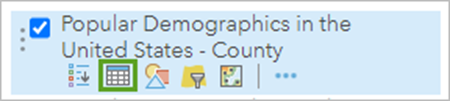

11. 次に、ある州、例えばニュージャージー州の郡のみを表示するようにデータをフィルタリングします。どの州を選んでもかまいません。まず、**Popular Demographics in the United States - County** レイヤーの下にある **Filter (フィルター)** ボタンをクリックします。

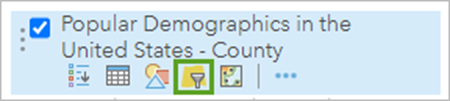

12. フィルター画面で、最初のフィールドに **ST_ABBREV** を設定します。最後のフィールド（翻訳者注釈：日本語版の場合は2番目のフィールド）に、選択した州の略語を設定します（例：ニュージャージー州は **NJ** ）。


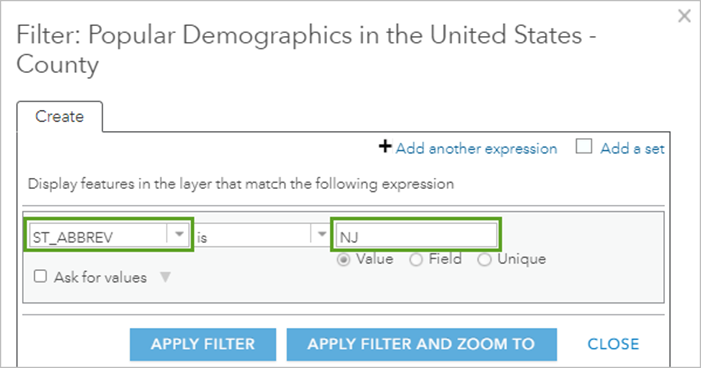

13. **Apply Filter And Zoom To (フィルターの適用とズーム)** をクリックし、フィルターの適用と選択した州にズームを行います。

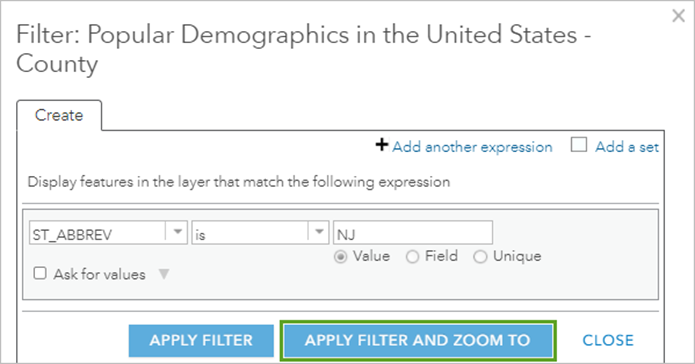

フィルターを適用すると、選択した州の郡だけが表示されるようになります。

# クエリの結果を Spatially Enabled DataFrame に格納する<a class="anchor" id="query"></a>

SEDFを使用して、SEDFに読み込む際にフィーチャ レイヤーに対して [```query```](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=query#arcgis.features.FeatureLayer.query) を指定することで、フィーチャ レイヤーのレコードのサブセットを作成することができます。これは、ArcGIS Online でレイヤーにフィルターを適用するのと同じです。Spatially Enabled DataFrames を使った方法を紹介します。[Spatially Enabled DataFrame へフィーチャ レイヤーを読み込む](#reading) の作業で作成したノートブックに戻ります。ノートブックを再起動し、すでに入力されているセルを再実行する必要がある場合があります。


1. **County** レイヤーの ```item.layers[2]``` から、フィーチャ レイヤー オブジェクトを作成します。

In [ ]:
fl = item.layers[2]

これは、通常のArcGIS Python API のフィーチャー レイヤー オブジェクトであり、SEDFではありません。

2. 例えば、ニュージャージー州のように、指定した州に関連するフィーチャのみを返すには [```query```](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=query#arcgis.features.FeatureLayer.query) メソッドを使用します。これは ```fl.query(where="ST_ABBREV = 'NJ'")``` を使用して行うことができます。

In [ ]:
nj_fql =  fl.query(where="ST_ABBREV = 'NJ'")

3. 州内のマップを作成し、表示します。

In [ ]:
nj_map = gis.map('New Jersey, USA')
nj_map

4. ```add_layer``` を使って、先ほど作成したアイテムをマップに追加してください。選択した州内の郡だけが表示されましたか？

In [ ]:
nj_map.add_layer(nj_fql)

5. クエリの結果を、Spatially Enabled DataFrameとして返却することができます。[```query```](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=query#arcgis.features.FeatureLayer.query) メソッドを使用し、選択した州に関連するフィーチャのみを選択しDataFrame オブジェクトとして返却するように指定します。例えば、ニュージャージー を選択し、SEDF をサブセットにする場合は、```fl.query(where="ST_ABBREV = 'NJ'").sdf``` を使用します。  

[```.sdf``` メソッド](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=sdf#arcgis.features.FeatureSet.sdf) を使用すると、クエリをSEDFとして返却することができます。

In [ ]:
nj_sedf = fl.query(where="ST_ABBREV = 'NJ'").sdf

6. SEDFの最初の5つのレコードを表示し、それらがすべて選択した州に対応していることを確認します。

In [ ]:
nj_sedf.head()

6. ノートブックで ```spatial.plot()``` メソッドを使うと、SEDFをマップ上にプロットすることができます。それを試してみてください。そのマップには、あなたが使っている州の郡の境界が表示されていますか？

In [ ]:
nj_sedf.spatial.plot()

plot メソッドは、マップ上のフィーチャの見た目をカスタマイズするために使用することができます。プロットしたフィーチャのシンボルを変更する方法については、[Visualizing Spatial Data](https://developers.arcgis.com/python/guide/visualizing-data-with-the-spatially-enabled-dataframe/) のチュートリアルを参照してください。

さらに重要なのは、SEDFとしてデータを保持すれば、Pandasが提供する多くのデータ解析関数や機能を利用できることでしょう。

# Spatially Enabled DataFrame を公開する<a class="anchor" id="publish"></a>

ArcGIS Online アカウントで、[to_featurelayer](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=to_featurelayer#arcgis.features.GeoAccessor.to_featurelayer) メソッドを使用して、SEDF を直接フィーチャ サービスとして公開することができます。例えば、SEDF 内で属性値に対して Pandas でデータ分析を行い、ArcGIS Online でその変換されたレイヤーを使用する準備ができた後に、この操作を行うことができます。例として、作成したサブセットをこれから公開します。

1. ```nj_sedf.spatial.to_featurelayer('NJ_Demographic_Layer_YOURINITIALS', tags=['ArcGIS Learn', 'Learn Lesson'])``` を呼び出して、サブセットを公開します。レイヤーの名前に *NJ_Demographic_Layer_* と自分のイニシャルを続け、アイテムにいくつかのタグを付けます。

In [ ]:
nj_demographics = nj_sedf.spatial.to_featurelayer('NJ_Demographic_Layer_YOURINITIALS', 
                                              tags=['ArcGIS Learn', 'Learn Lesson'])

2. 新しいコード セルに ```nj_demographics``` と入力して実行すると、そのアイテムをプレビューすることができます。

In [ ]:
nj_demographics

3. ArcGIS Notebook にニュージャージー州の新しいmap view オブジェクトを作成し、表示します。

In [ ]:
nj_map = gis.map('New Jersey, USA')
nj_map

4. 先ほど作成したアイテムをマップに追加するには、```add_layer``` を使用します。

In [ ]:
nj_map.add_layer(nj_demographics)

# フィーチャクラスやシェープファイルへ書き込む <a class="anchor" id="write-to-fc"></a>

また、[```to_featureclass```](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=to_featureclass#arcgis.features.GeoAccessor.to_featureclass) メソッドを使って、ジオデータベース内のフィーチャクラスやシェープファイルにSEDFを書き込むことも可能です。

1. ```to_featureclass``` メソッドを使用して、SEDFを */arcgis/home* フォルダー にシェープファイルとして保存します。ファイル名を *NJ_Demographics_Layer_* とし、あなたのイニシャルと *.shp* という拡張子を付けてください。名前には、スペースやアンダースコア以外の特殊文字を含めないでください。フィーチャクラスに書き込む場合は、このフォルダー にジオデータベースを作成してから書き込む必要があります。

In [ ]:
nj_sedf.spatial.to_featureclass('/arcgis/home/NJ_Demographics_Layer_YOURINITIALS.shp', overwrite=True)

2. ノートブックで **Files (ファイル)** タブを開きます。

3. */arcgis/home* フォルダーに移動し、シェープファイルが作成されたことを確認します。

4. **home** フォルダー下にシェープファイルが保存されていることを確認します。


# フィーチャクラスをSpatially Enabled DataFrame へ読み込む<a class="anchor" id="fc-to-sedf"></a>

また、[```from_featureclass```](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=from_featureclass#arcgis.features.GeoAccessor.from_featureclass) メソッドを使用して、シェープファイルやフィーチャークラスをSEDFに読み込むこともできます。

1. 作成したシェープファイルをSEDFに読み込みます。 
シェープファイル名は必ず自分のイニシャルを含むように変更してください。

In [ ]:
nj_sedf_from_fc = pd.DataFrame.spatial.from_featureclass('/arcgis/home/NJ_Demographics_Layer_YOURINITIALS.shp')

2. SEDF の最初の 3 行を ```head()``` 関数で表示してください。これらの行はすべて、あなたが選んだ州に対応していますか？

In [ ]:
nj_sedf_from_fc.head(3)

# データのプロット<a class="anchor" id="plotting"></a>

ArcGIS Notebooks には、Matplotlib、pandas、seaborn、Plotly など、いくつかの作図パッケージが含まれています。これらの Python パッケージは、非空間的な変数を探索できるため、pandas と Spatially Enabled DataFrame の良い補完となります。このセクションでは、Matplotlib、pandas、seaborn、Plotlyを紹介し、それらを使ってSEDFからデータを作図する方法について説明します。

## Matplotlib <a class="anchor" id="matplotlib"></a>

[Matplotlib](https://matplotlib.org/) は Python でリッチでインタラクティブなグラフを作成するための包括的なライブラリです。このライブラリは ```numpy``` オブジェクトと pandas dataframe オブジェクトと一緒に使用することができます。ここでは、```matplotlib``` を使って、ニュージャージー  SEDF の属性から [```棒```](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.bar.html) グラフを生成する方法について学びます。

1. SEDFを作図する前に、pandas [```sort```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) メソッドを使用して、データフレームを 'totpop_cy' 値の降順でソートします。

In [ ]:
nj_sedf_from_fc.sort_values('totpop_cy', ascending=False, inplace=True)

2. 値がソートされたので、```head()``` 関数を使って最初の 10 個の値を表示し、値が降順になっていることを確認します。

In [ ]:
nj_sedf_from_fc.head(10)

3. ```pyplot``` を ```plt``` として ```matplotlib``` からインポートします。

In [ ]:
import matplotlib.pyplot as plt

4. ```nj_sedf_from_fc['name']``` を x 軸、```nj_sedf_from_fc['totpop_cy']``` を y 軸の変数として、```bar``` 関数を使用してプロットしてください。同じコード セルで、```ax = plt.xticks(nj_sedf_from_fc['name'], nj_sedf_from_fc['name'], rotation='vertical')``` と入力して、```xticks``` 関数を使用して郡名のラベルを縦方向に配置します。

In [ ]:
plt.bar(nj_sedf_from_fc['name'], nj_sedf_from_fc['totpop_cy'])
ax = plt.xticks(nj_sedf_from_fc['name'], nj_sedf_from_fc['name'], rotation='vertical')

次に、pandasの組み込みのグラフ作成機能を使って、このグラフを作成する方法をご覧ください。

## Pandas <a class="anchor" id="pandas"></a>

Pandasはデータフレームからグラフを作成するビルトイン関数を提供しています。これらのビルトイン関数は Matplotlib を使用しており、同様の構文を使用して同様の外観のグラフを作成できます。これらのプロット関数を呼び出すことで、Spatially Enabled DataFrame内の変数をプロットすることができます。例えば、[```bar```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) 関数を使用すると、棒グラフを素早く作成することができます。

1. ```bar``` 関数を使用してdataframe をプロットします。

In [ ]:
nj_sedf_from_fc.plot.bar(x='name', y='totpop_cy', rot=90)

たった1行のコードで、SEDF から ```棒``` グラフを作成しました。

## Seaborn <a class="anchor" id="seaborn"></a>

[Seaborn](https://seaborn.pydata.org/introduction.html) は matplotlib の上に構築され、pandas と統合された Python のプロッティングライブラリです。Matplotlib のみを使用するよりも、より美しいグラフを生成するために使用することができます。

1. ```seaborn``` をインポートし、プロットスタイルを[```set_style```](https://seaborn.pydata.org/generated/seaborn.set_style.html) 関数を使って、```'whitegrid'``` に設定します。

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')

2. [```barplot```]() を使用して、seaborn を使用した棒グラフを作成します。x軸の変数ラベルの向きは ```ax.set_xticklabels(nj_sedf_from_fc['name'],rotation=90)``` を使って設定します。

In [ ]:
ax = sns.barplot(x=nj_sedf_from_fc['name'], y=nj_sedf_from_fc['totpop_cy'])
ax.set_xticklabels(nj_sedf_from_fc['name'],rotation=90)

いかがでしょうか？あなたはどのグラフが好みですか？

## Plotly <a class="anchor" id="plotly"></a>

[Plotly](https://plotly.com/python/) は、Web ページに埋め込まれたインタラクティブな出版品質のグラフを作成できるグラフ作成ライブラリです。インタラクティブなグラフを作ることができ、ArcGIS Notebooks にも含まれています。ここでは、[Plotly Express](https://plotly.com/python/plotly-express/) を使って、上記と同じ人口データのインタラクティブなグラフを作成します。

1. ```import plotly.express as px``` を使って、Plotly Express をインポートします。

In [ ]:
import plotly.express as px

2. 'name' と 'totpop_cy' の列を xの変数と yの変数として、[```棒```](https://plotly.com/python-api-reference/generated/plotly.express.bar.html) グラフを作成します。

In [ ]:
fig = px.bar(nj_sedf_from_fc, x='name', y='totpop_cy')
fig.show()

3. グラフにカーソルを合わせると、ツールチップが表示されるのに注目してください。Plotly のグラフは、ArcGIS notebooks で動作するインタラクティブな HTML オブジェクトです。

あなたはどのグラフが一番好みですか?

# 要約 <a class="anchor" id="summary"></a>

このレッスンでは、Spatially Enabled DataFrameの使用方法について学習しました。SEDFにフィーチャを読み込む方法、SEDFからフィーチャクラスへの書き込み、フィーチャ サービスを公開する方法、SEDFを使ってマップ上にフィーチャを表示する方法、SEDFのデータを表示するために様々な作図ライブラリを使用する方法について学習しました。Spatially Enabled DataFrame の世界をより深く知りたい方は、以下の [Introduction to the Spatially Enabled DataFrame](https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/)、[Visualizing Spatial Data](https://developers.arcgis.com/python/guide/visualizing-data-with-the-spatially-enabled-dataframe/)、[Spatially Enabled DataFrames - Advanced Topics](https://developers.arcgis.com/python/guide/spatially-enabled-dataframe-advanced-topics/) のチュートリアルをご覧ください。ArcGIS Notebooks で試してみてください。もし、それらを試す準備ができたら、以下の [**チャレンジ**](#challenge) 問題に挑戦してみてください。

# チャレンジ <a class="anchor" id="challenge"></a>

1. 上で調べたの同じ州と総人口のデータで、[Matplotlib](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html) と [Plotly](https://plotly.com/python-api-reference/generated/plotly.express.pie.html) を使用して、円グラフを作成します。
2. ArcGIS Living Atlas の [**County Health Rankings**](https://learngis.maps.arcgis.com/home/item.html?id=4dc9f89d893b40cf85e4fd59e5a444f0) を Spatially Enabled DataFrame に読み込んでください。特定の州のデータのサブセットを作成します。Matplotlib、seaborn、Plotly を使用して、任意の変数の棒グラフまたは円グラフを作成します。